Part-1

Task-1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split




In [3]:

data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target


In [4]:

X = df[['AveRooms']]
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

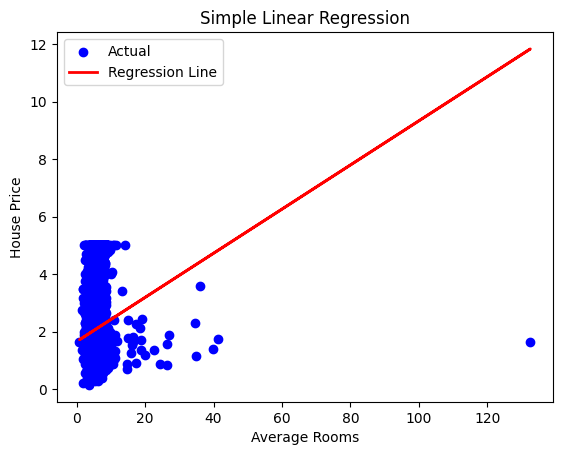

In [6]:
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Average Rooms')
plt.ylabel('House Price')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()


Task-2

In [7]:
from sklearn.metrics import mean_squared_error, r2_score

In [8]:

X = df.drop('Target', axis=1)
y = df['Target']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)
y_pred = mlr_model.predict(X_test)

In [10]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R-squared: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

R-squared: 0.5758
MSE: 0.5559
RMSE: 0.7456


In [11]:

coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": mlr_model.coef_
})
print(coeff_df)


      Feature  Coefficient
0      MedInc     0.448675
1    HouseAge     0.009724
2    AveRooms    -0.123323
3   AveBedrms     0.783145
4  Population    -0.000002
5    AveOccup    -0.003526
6    Latitude    -0.419792
7   Longitude    -0.433708


Task-3


In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
scaled_model = LinearRegression()
scaled_model.fit(X_train, y_train)

y_pred_scaled = scaled_model.predict(X_test)

In [15]:

r2_scaled = r2_score(y_test, y_pred_scaled)
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
rmse_scaled = np.sqrt(mse_scaled)

print("\nAfter Scaling:")
print(f"R-squared: {r2_scaled:.4f}")
print(f"MSE: {mse_scaled:.4f}")
print(f"RMSE: {rmse_scaled:.4f}")



After Scaling:
R-squared: 0.5758
MSE: 0.5559
RMSE: 0.7456


In [ ]:
!pip install seaborn
import seaborn as sns

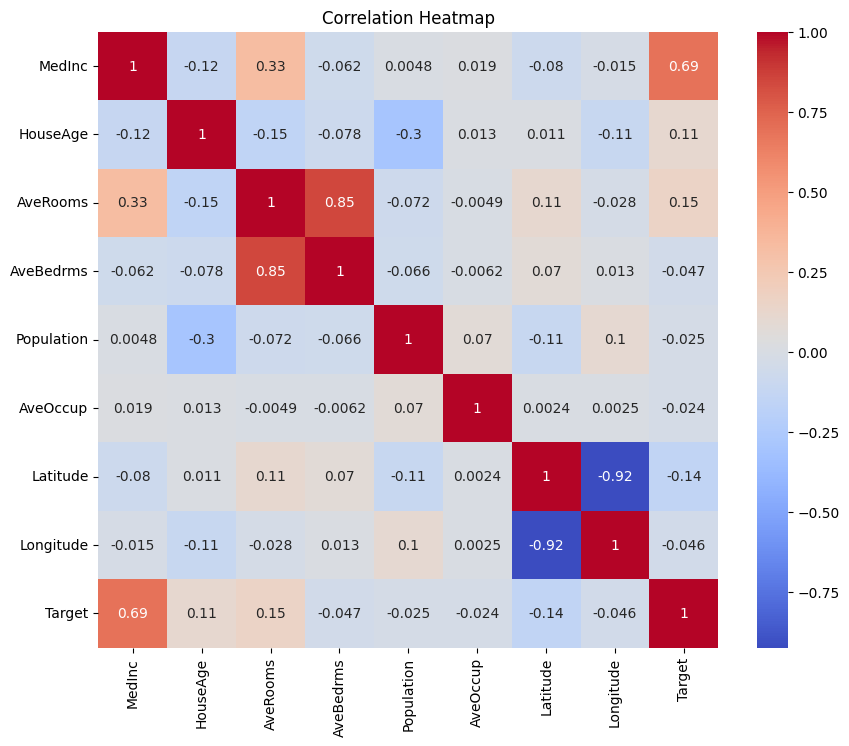

In [21]:
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [22]:
corr_target = corr['Target'].drop('Target').sort_values(key=abs, ascending=False)
print("\nFeatures most correlated with Target:\n", corr_target)



Features most correlated with Target:
 MedInc        0.688075
AveRooms      0.151948
Latitude     -0.144160
HouseAge      0.105623
AveBedrms    -0.046701
Longitude    -0.045967
Population   -0.024650
AveOccup     -0.023737
Name: Target, dtype: float64


In [23]:
print("\nDiscussion on Multicollinearity:")
print("""
Multicollinearity occurs when two or more independent variables are highly correlated.
It can make coefficient estimates unstable and inflate standard errors, making interpretation difficult.
To detect it, we can use correlation matrix or Variance Inflation Factor (VIF).
Mitigation methods include removing correlated features or using dimensionality reduction (like PCA).
""")



Discussion on Multicollinearity:

Multicollinearity occurs when two or more independent variables are highly correlated.
It can make coefficient estimates unstable and inflate standard errors, making interpretation difficult.
To detect it, we can use correlation matrix or Variance Inflation Factor (VIF).
Mitigation methods include removing correlated features or using dimensionality reduction (like PCA).



Part-2


Task-5

In [24]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
data = load_breast_cancer()

In [26]:
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [27]:

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1] 

In [28]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))


Accuracy: 0.956140350877193
Confusion Matrix:
 [[39  4]
 [ 1 70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

ROC-AUC Score: 0.9977071732721913


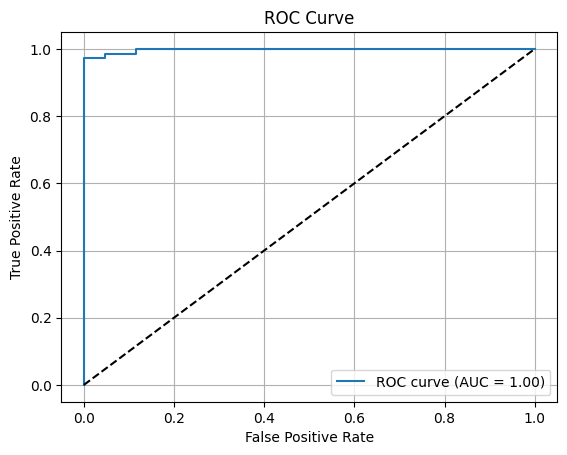

In [29]:

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc_score(y_test, y_prob))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

Task-6

In [30]:
thresholds_to_test = [0.3, 0.5, 0.7]

for thresh in thresholds_to_test:
    print(f"\nThreshold = {thresh}")
    y_thresh = (y_prob >= thresh).astype(int)
    cm = confusion_matrix(y_test, y_thresh)
    print("Confusion Matrix:\n", cm)
    print("F1 Score:", classification_report(y_test, y_thresh, output_dict=True)['weighted avg']['f1-score'])


Threshold = 0.3
Confusion Matrix:
 [[39  4]
 [ 1 70]]
F1 Score: 0.9558014271241044

Threshold = 0.5
Confusion Matrix:
 [[39  4]
 [ 1 70]]
F1 Score: 0.9558014271241044

Threshold = 0.7
Confusion Matrix:
 [[41  2]
 [ 1 70]]
F1 Score: 0.973621425014614


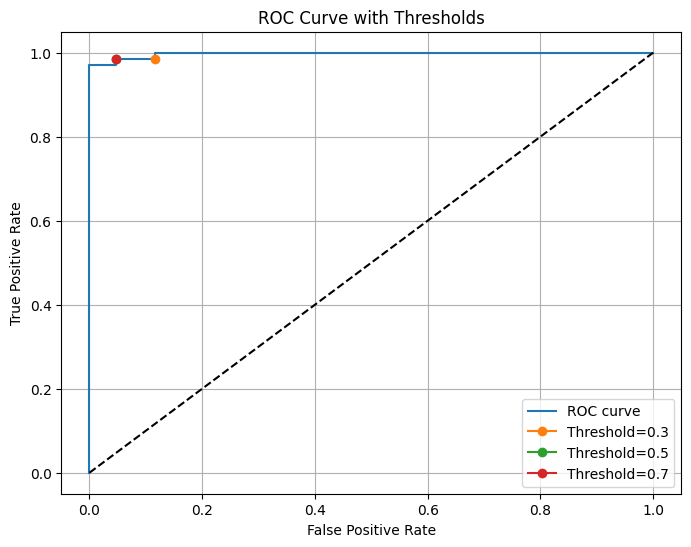

In [31]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve')
for t in thresholds_to_test:
    idx = (np.abs(thresholds - t)).argmin()
    plt.plot(fpr[idx], tpr[idx], marker='o', label=f'Threshold={t}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Thresholds')
plt.legend()
plt.grid(True)
plt.show()

Task-7

In [32]:
from sklearn.datasets import load_iris

In [33]:
iris = load_iris()
X, y = iris.data, iris.target

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [35]:
multi_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
multi_model.fit(X_train, y_train)
y_pred = multi_model.predict(X_test)

C:\Users\shubh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [36]:

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



Part-3


1. What are the assumptions of linear regression?

Linear relationship between independent and dependent variables

Independence of observations

Homoscedasticity (equal variance of residuals)

Residuals are normally distributed

No or little multicollinearity among features

2. When should you use logistic regression instead of linear regression?
Use logistic regression when the target variable is categorical, especially for binary classification (e.g., spam or not spam). Linear regression is inappropriate for classification tasks as it predicts continuous values.

3. What is the interpretation of coefficients in logistic regression?
Each coefficient represents the log odds change in the target outcome for a one-unit increase in the feature, holding all other features constant. Exponentiating the coefficient gives the odds ratio.

4. What is the difference between sigmoid and softmax functions?

Sigmoid: Used for binary classification; maps output to a probability between 0 and 1.

Softmax: Used for multiclass classification; generalizes sigmoid to multiple classes, outputs probabilities that sum to 1.

5. Why is R-squared not suitable for evaluating logistic regression models?
R-squared measures the proportion of variance explained in a linear regression model. Logistic regression does not predict continuous outcomes, so R² isn't meaningful. Instead, use metrics like accuracy, log-loss, or ROC-AUC.